In [4]:
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


In [5]:
def filter(data, deviance):
    cnt, bins, g    = plt.hist(data[:, 2], bins=100)
    
#     print "mean", np.mean(data[:, 2])
#     print "median",  np.median(data[:, 2])
    
    center       = bins[np.argmax(cnt)]
    reduced_data = []

    for i in range(data.shape[0]):
        if (center - deviance < data[i, 2] < center + deviance):
            if reduced_data == []:
                reduced_data = np.array(data[i])
            else:
                reduced_data = np.vstack([reduced_data, data[i]])
    return reduced_data

In [10]:
def plot_flat(data, A, B, D):
    
    X,Y = np.meshgrid(np.arange(-30.0, 30.0, 0.5), np.arange(-30.0, 30.0, 0.5))
    
    Z = (-A*X - B*Y - D)
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=1)
    ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=10)
    plt.xlabel('X')
    plt.ylabel('Y')
    ax.set_zlabel('Z')
    ax.axis('equal')
    ax.axis('tight')
    plt.show()

In [11]:
def find_flat(data):
    M = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]   #metod naimenshih kvadratov dlya flat surface
    C,_,_,_ = np.linalg.lstsq(M, data[:,2], rcond=-1) 

    AA = -C[0]
    BB = -C[1]
    CC = 1
    DD = -C[2]
        
#     print "LSTSQ returns:", "%.6f" % (C[0]), "%.6f" % (C[1]), "%.6f" % (C[2])

    return (AA, BB, CC, DD)

In [12]:
def check_dist(data, A, B, C, D, thresh):
    dists_cnt = 0
#     print "Checking distances..."
    for p in data:
        up   = abs(A*p[0] + B*p[1] + C*p[2] + D)
        down = (A**2. + B**2. + C**2.)**0.5
        dist = float(up / down)
        if dist <= thresh:
            dists_cnt += 1

#     print "Good points (dist < threshold): ", dists_cnt
#     print "All  points: ", data.shape[0]

    procent = (float(dists_cnt)*100)/(float(data.shape[0]))

    return procent
#     if procent >= 50:
#         return "Good points procent =", procent, ": SUCCESS" 
#     else:
#         return "Good points procent =", procent, ": ty pidor"
    
# for dist in dists:
#     print  "%.7f" % (dist)



**Основная часть**

Result coefficients: -0.012043 -0.003092 1.000000 0.280462
Checking Ax + By + Cz + D = 0
Data shape      :  19280


/Applications/anaconda/envs/ML_course/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


Reduced data shape:  19258
Result coefficients: -0.012070 -0.002934 1.000000 0.285931
Checking Ax + By + Cz + D = 0
Data shape      :  19258
Reduced data shape:  19249
Result coefficients: -0.012056 -0.002945 1.000000 0.287371
Checking Ax + By + Cz + D = 0
Data shape      :  19249
Reduced data shape:  19235
Result coefficients: -0.011928 -0.003001 1.000000 0.289320
Checking Ax + By + Cz + D = 0
Data shape      :  19235
Reduced data shape:  19228
Result coefficients: -0.011844 -0.002988 1.000000 0.290103
Checking Ax + By + Cz + D = 0
Data shape      :  19228
Reduced data shape:  19196
Result coefficients: -0.011594 -0.003105 1.000000 0.294304
Checking Ax + By + Cz + D = 0
Data shape      :  19196
Reduced data shape:  19195
Result coefficients: -0.011597 -0.003107 1.000000 0.294464
Checking Ax + By + Cz + D = 0
Data shape      :  19195
Reduced data shape:  19152
Result coefficients: -0.011601 -0.003156 1.000000 0.300614
Checking Ax + By + Cz + D = 0
Data shape      :  19152
Reduced data 

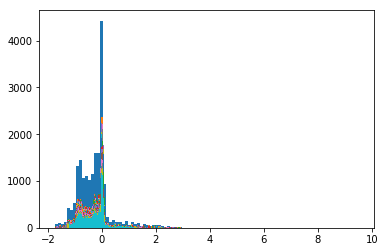

KeyboardInterrupt: 

In [39]:
filepath   = "./src/sdc_point_cloud.txt"
datafile   = open(filepath, 'r')

thresh     = float(datafile.readline())
points_cnt = int(datafile.readline())

data = np.zeros((points_cnt, 3))

for i in range(data.shape[0]):
    string = datafile.readline()
    splited = string.split('\t')
    data[i] = [float(splited[0]), float(splited[1]), float(splited[2])]

datafile.close()    

deviance = 3
finish   = False
iterations = 0
while (finish == False) and (deviance > 0):
    iterations += 1
    A, B, C, D = find_flat(data)  
    print "Result coefficients:", "%.6f" % (A), "%.6f" % (B), "%.6f" % (C), "%.6f" % (D)
    procent = check_eq2(data, A, B, C, D, thresh)
    if procent > 50:
        finish = True
        print "Finished"
    else:
        print "Data shape      : ", data.shape[0]
        data = filter(data, deviance)
        deviance -= 0.1
        print "Reduced data shape: ", data.shape[0]

print iterations
plot_flat(data, A, B, D)

**Функции для тождественной проверки полученных уравнений по всем точкам из исходного массива Data**

In [29]:
def check_eq1(data, A, B, D):
    print "Checking z = Ax + By + C"
    for p in data:
        x, y, z = p[0], p[1], p[2]
        right = A*x + B*y + D
        print z, '?=', right
        
def check_eq2(data, A, B, C, D, thresh):
    print "Checking Ax + By + Cz + D = 0"
    dists_cnt = 0
    for p in data:
        x, y, z = p[0], p[1], p[2]
        left = A*x + B*y + C*z + D
#         print p, ":", left
        if abs(left) <= thresh:
            dists_cnt += 1
            
    procent = (float(dists_cnt)*100)/(float(data.shape[0]))
    return procent

**Код для вставки в Я.Контест**

In [1]:
# Check-list:
#     - RESTART KERNEL AND RUN AGAIN
#     - ADD PARENTIES TO PRINT
#     - CHECK INPUT FILENAME
    
import numpy as np

def filter(data, deviance):
    cnt, bins    = np.histogram(data[:, 2], bins=100)
    
    center       = bins[np.argmax(cnt)]
    reduced_data = []

    for i in range(data.shape[0]):
        if (center - deviance < data[i, 2] < center + deviance):
            if reduced_data == []:
                reduced_data = np.array(data[i])
            else:
                reduced_data = np.vstack([reduced_data, data[i]])
    return reduced_data

def check_eq2(data, A, B, C, D, thresh):
    dists_cnt = 0
    for p in data:
        x, y, z = p[0], p[1], p[2]
        left = A*x + B*y + C*z + D
        if abs(left) <= thresh:
            dists_cnt += 1
            
    procent = (float(dists_cnt)*100)/(float(data.shape[0]))
    return procent

filepath   = "./src/test3points_2.txt"
datafile   = open(filepath, 'r')

thresh     = float(datafile.readline())
points_cnt = int(datafile.readline())

dataset = np.zeros((points_cnt, 3))

for i in range(dataset.shape[0]):
    string = datafile.readline()
    splited = string.split('\t')
    dataset[i] = [float(splited[0]), float(splited[1]), float(splited[2])]

datafile.close() 

deviance=0.1
data = filter(dataset, deviance)

finish   = False
while (finish == False) and (deviance > 0):
    M = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
    coef, _, _, _ = np.linalg.lstsq(M, data[:,2], rcond=-1) 
    A = -coef[0]
    B = -coef[1]
    C = 1
    D = -coef[2]
    procent = check_eq2(dataset, A, B, C, D, thresh)
    if procent >= 50:
        finish = True
    else:
        deviance += 0.1
        data = filter(dataset, deviance)

print ("%.6f" % (A), "%.6f" % (B), "%.6f" % (C), "%.6f" % (D))

('-0.198020', '-0.000000', '1.000000', '-0.019802')


/Applications/anaconda/envs/ML_course/lib/python2.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  app.launch_new_instance()


In [3]:
a = np.array([1, 2, 3])
a = a + [0, 0, 1]
a

array([1, 2, 4])

('x_grad=-0.0', '\ty_grad=0.0')
Done in 14 steps


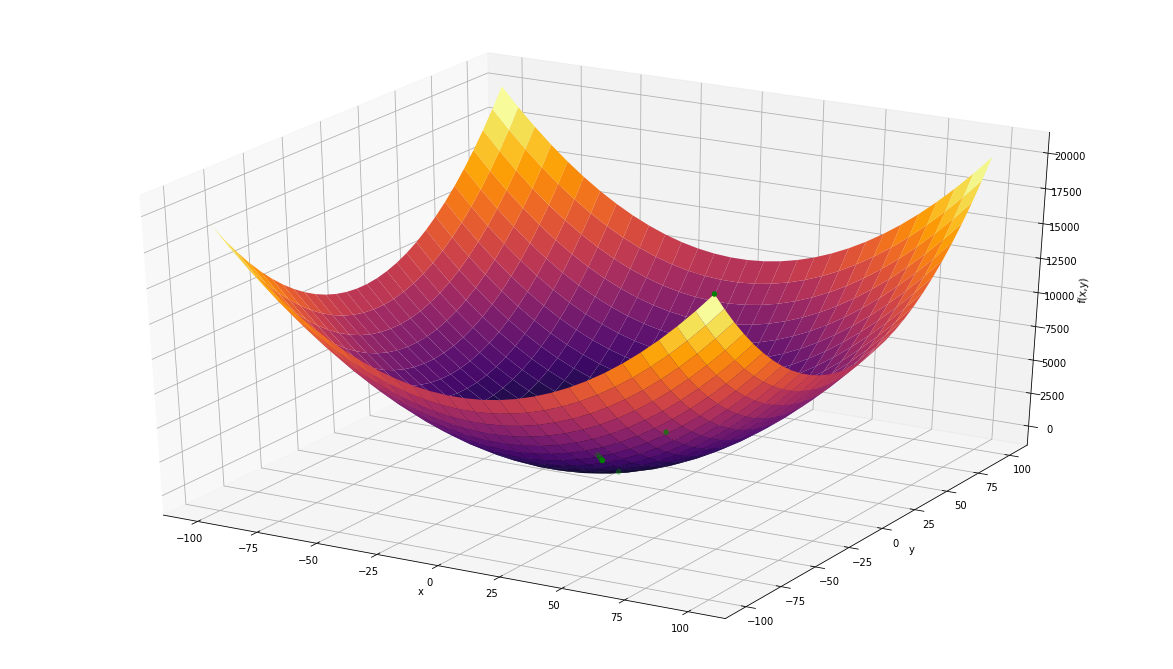

In [31]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
### Some convex function and its partial derivatives
def f(x, y):
    return x**2 + y**2

def dfdx(x, y):
    return 2*x

def dfdy(x, y):
    return 2*y

### Plot
x = np.linspace(-100, 100, 30)
y = np.linspace(-100, 100, 30)
X, Y = np.meshgrid(x, y)

Z = f(X, Y)

fig = plt.figure(figsize=(16,9))
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='inferno')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')

### Gradient Descent
momentum = 0.1
learning_rate = 0.2
x_min, y_min = 100, -100
x_grad, y_grad = 1, 1
x_grad_prev, y_grad_prev = 0, 0
x_data_point = []
y_data_point = []
z_data_point = []
steps = 0
while abs(x_grad)>0.01 and abs(y_grad)>0.01 :
    x_data_point.append(x_min)
    y_data_point.append(y_min)
    z_data_point.append(f(x_min, y_min))
    x_grad = dfdx(x_min, y_min)
    y_grad = dfdy(x_min, y_min)
    x_min -= (learning_rate*x_grad + momentum * x_grad_prev)
    y_min -= (learning_rate*y_grad + momentum * y_grad_prev)
    x_grad_prev, y_grad_prev = x_grad, y_grad
    steps += 1

print("x_grad=%.1f"%x_grad,"\ty_grad=%.1f"%y_grad)
print("Done in %d steps" % steps)

ax.scatter(x_data_point, y_data_point, z_data_point, s=20, c='g', marker='o')
plt.show()